In [1]:
import numpy as np
from numba import njit
import matplotlib.pyplot as plt

## Стандартный алгоритм

В стандартном алгоритм мы просто считаем отношение $dy/dx$ и таким образом получаем значение производной в дискретных точках

In [51]:
def f(x):
    return np.exp(x)

In [3]:
def derivative(x, dx):
    return (f(x + dx) - f(x)) / dx

In [4]:
end_x = 2
dx = 0.01
x_pnt = np.linspace(0, end_x, int(end_x / dx))
#dx = x_pnt[1] - x_pnt[0]
res_func = []
for x in x_pnt:
    res_func.append(derivative(x, dx))
    

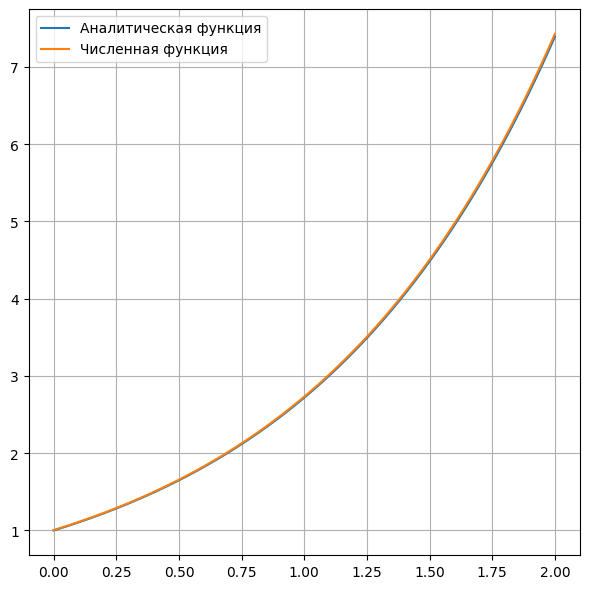

In [5]:
fig, ax = plt.subplots(figsize=(6,6), layout='tight')
ax.plot(x_pnt, f(x_pnt), label='Аналитическая функция')
ax.plot(x_pnt, res_func, label='Численная функция')
ax.grid()
ax.legend()

## Двухточечная схема

Самая точная схема вычисления - средняя. Формула:

$f'(x)=\frac{f(x+dx)-f(x-dx)}{2*dx}$

Также теперь представим, что функция задана не аналитически, а дискретно

In [6]:
dx = 0.01
end_x = 2
x_pnt = np.linspace(0, end_x, int(end_x / dx))
func_pnt = f(x_pnt)

In [7]:
def derivative(f1, f2, dx):
    return (f2 - f1) / (2 * dx)

In [8]:
res_func = []
x_res_func = []
for i in range(1, func_pnt.shape[0] - 1):
    res_func.append(derivative(func_pnt[i - 1], func_pnt[i + 1], dx))

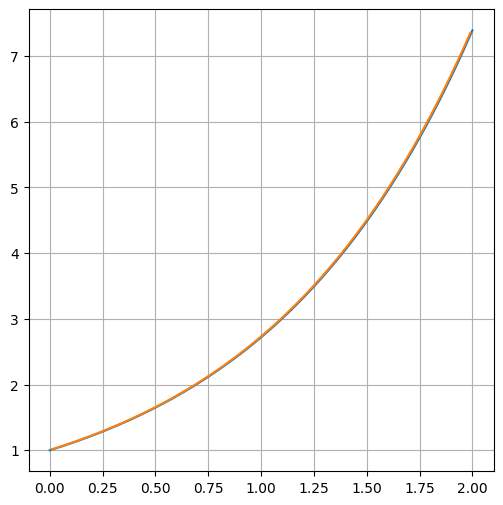

In [9]:
fig, ax = plt.subplots(figsize=(6,6))
ax.grid()
ax.plot(x_pnt, func_pnt, label='Аналитическая функция')
ax.plot(x_pnt[1:-1], res_func, label='Численная функция')

Также можно использовать трехточечную схему, взяв среднюю точку интервала $2dx$, как 3-ю точку

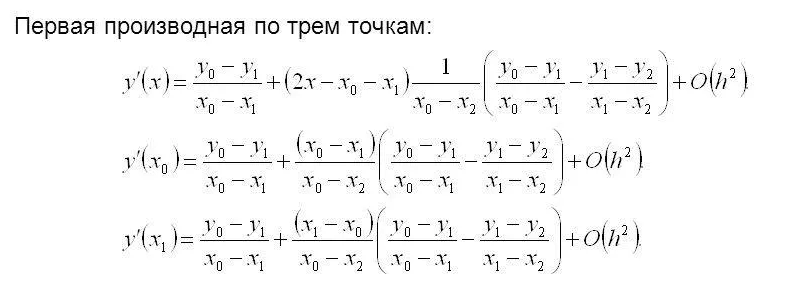

## Введение переменного шага

Воспользуемся методом двойного пересчета, чтобы ускорить время работы алгоритма.

Идея метода в следующем: вычисляем производную с шагом `h`, затем с шагом `h/2`. Далее возможны следующие варианты:

1) $|I_{h} - I_{h/2}| < E$, ($E$ - допустимая погрешность) тогда можем принять $I_{h} = I_{h/2}$
2) $|I_{h} - I_{h/2}| > E$, тогда повторяем расчет с шагом $h/4$

В качестве начального шага можно рекомендовать число близкое к $\sqrt[m]{E}$, где $m = 2$ - например, для формулы трапеций при интегрировании или $m = 4$ - для формулы Симпсона

### Более менее жесткая система

In [52]:
def derivative_const_step(end, dx):
    x_pnt = np.linspace(0, end, int(end/dx))
    result = []
    for x in x_pnt:
        result.append((f(x + dx) - f(x - dx)) / (2 * dx))
    return result

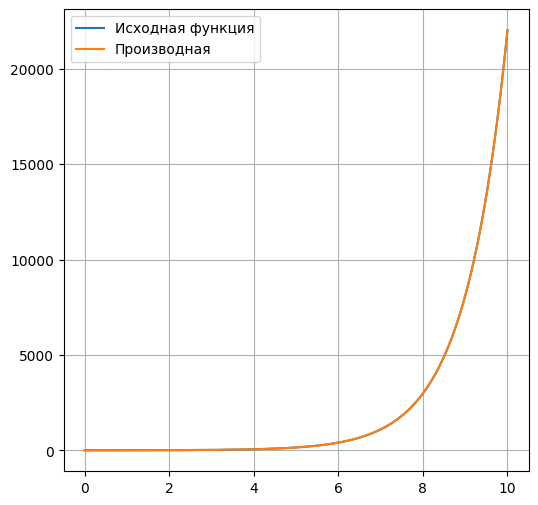

In [53]:
accuracy = 10**(-4)
dx = accuracy ** (1/2)
end_pnt = 10
x_pnt = np.linspace(0, end_pnt, int(end_pnt/dx))

res_func = derivative_const_step(end_pnt, dx)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x_pnt, f(x_pnt), label='Исходная функция')
ax.plot(x_pnt, res_func, label='Производная')
ax.grid()
ax.legend()

In [54]:
def derivative_var_step(end, max_step, acc):
    x_pnt = []
    result = []
    steps = []
    x = 0
    step = (acc)**(1/2)
    
    while x < end:
        func_n = (f(x + step) - f(x - step)) / (2 * step)
        func_2n = (f(x + step / 2) - f(x - step / 2)) / (2 * step / 2)
        if np.abs(func_2n - func_n) < acc:
            x_pnt.append(x)
            result.append(func_n)
            steps.append(step)
            x += step
            step = max_step
        else:
            step = step / 4
            continue
    return x_pnt, result, steps

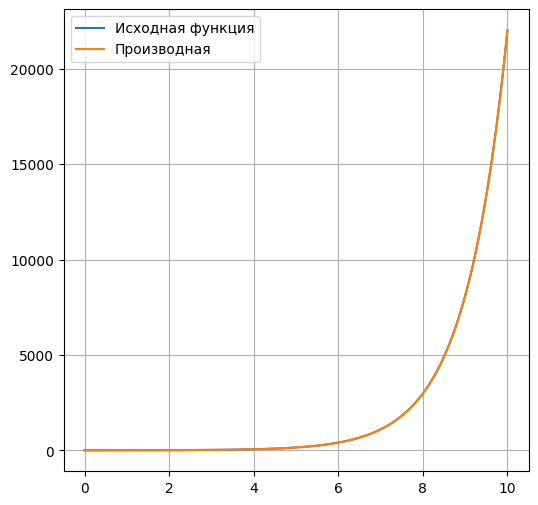

In [55]:
accuracy = 10**(-4)
dx = accuracy ** (1/2)
end_pnt = 10
x_pnt = np.linspace(0, end_pnt, int(end_pnt/dx))

x, res_func, steps = derivative_var_step(end_pnt, dx, accuracy)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x_pnt, f(x_pnt), label='Исходная функция')
ax.plot(x, res_func, label='Производная')
ax.grid()
ax.legend()

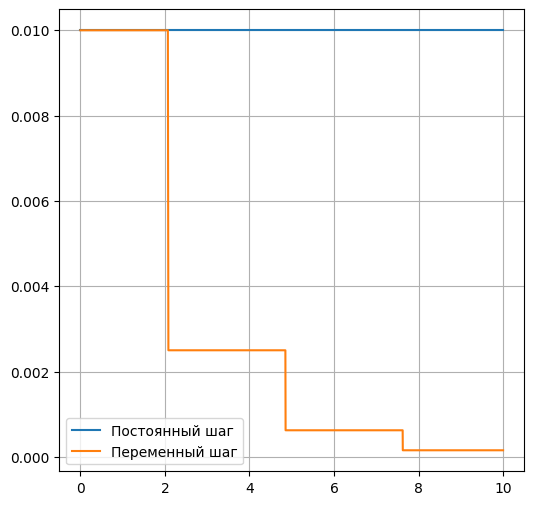

In [56]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x_pnt, [dx for _ in range(x_pnt.shape[0])], label='Постоянный шаг')
ax.plot(x, steps, label='Переменный шаг')
ax.grid()
ax.legend()

### Не жесткая система

In [57]:
def f(x):
    return np.sin(x)

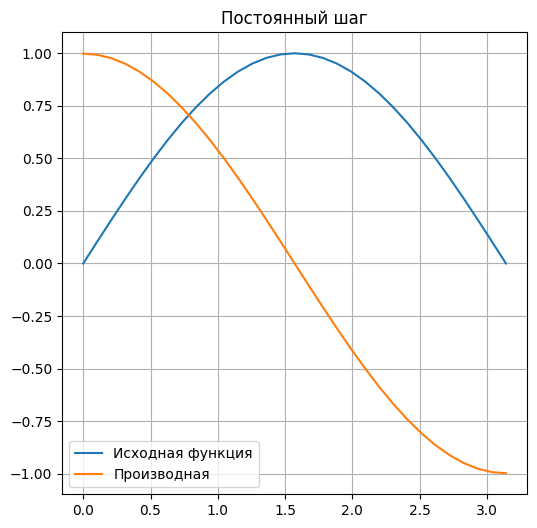

In [58]:
accuracy = 10**(-4)
dx = accuracy ** (1/4)
end_pnt = np.pi
x_pnt = np.linspace(0, end_pnt, int(end_pnt/dx))

res_func = derivative_const_step(end_pnt, dx)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x_pnt, f(x_pnt), label='Исходная функция')
ax.plot(x_pnt, res_func, label='Производная')
plt.title('Постоянный шаг')
ax.grid()
ax.legend()

Text(0.5, 1.0, 'Переменный шаг')

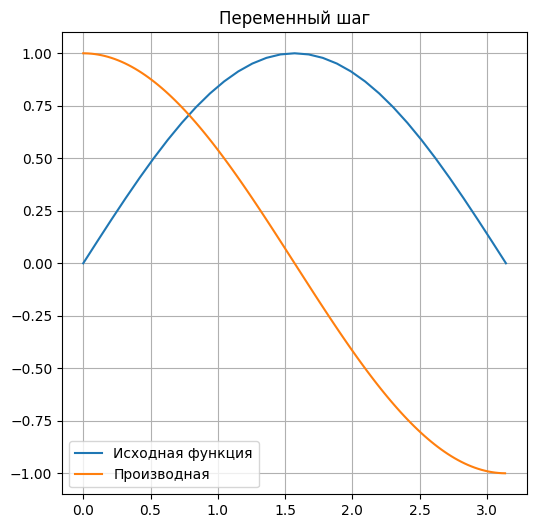

In [59]:
accuracy = 10**(-4)
dx = accuracy ** (1/4)
end_pnt = np.pi
x_pnt = np.linspace(0, end_pnt, int(end_pnt/dx))

x, res_func, steps = derivative_var_step(end_pnt, dx, accuracy)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x_pnt, f(x_pnt), label='Исходная функция')
ax.plot(x, res_func, label='Производная')
ax.grid()
ax.legend()
plt.title('Переменный шаг')

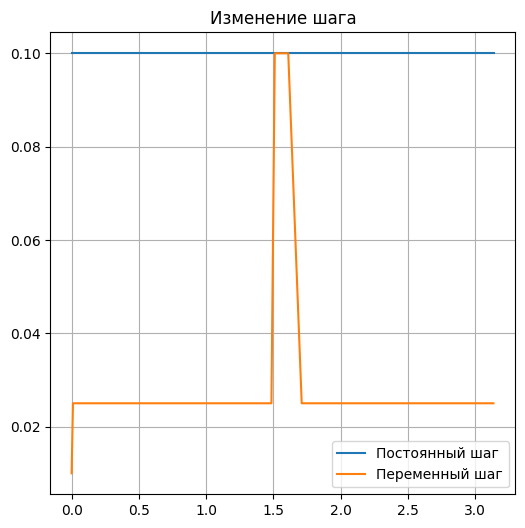

In [60]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x_pnt, [dx for _ in range(x_pnt.shape[0])], label='Постоянный шаг')
ax.plot(x, steps, label='Переменный шаг')
plt.title('Изменение шага')
ax.grid()
ax.legend()